In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt#for visualization
import seaborn as sns #for visualization
from wordcloud import WordCloud #for visualization
import string
from nltk.corpus import stopwords
from openpyxl import Workbook # converting csv -> xlsx
import re
import csv

In [2]:
dataset = pd.read_csv('CCMLEmployeeData.csv')

In [3]:
dataset.head()

,Name,Domain,Event1,Event2
0,Bryan Brock,Management,Jobs,Hackathons
1,Joseph Sullivan,Coding,Certifications,Webinars
2,Sherri Dawson,Security,Internships,Fests
3,Dustin Ferguson,Hardware,Competitions,Webinars
4,Kayla Young,Web Development,Expos,Certifications


In [4]:
event = set(dataset['Event1'])
event

{'Certifications',
 'Competitions',
 'Courses',
 'Expos',
 'Fests',
 'Hackathons',
 'Internships',
 'Jobs',
 'Seminars',
 'Talks',
 'Trainings',
 'Webinars',
 'Workshops'}

In [5]:
# to calculate various domains
len(set(dataset['Domain'].value_counts()))

8

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

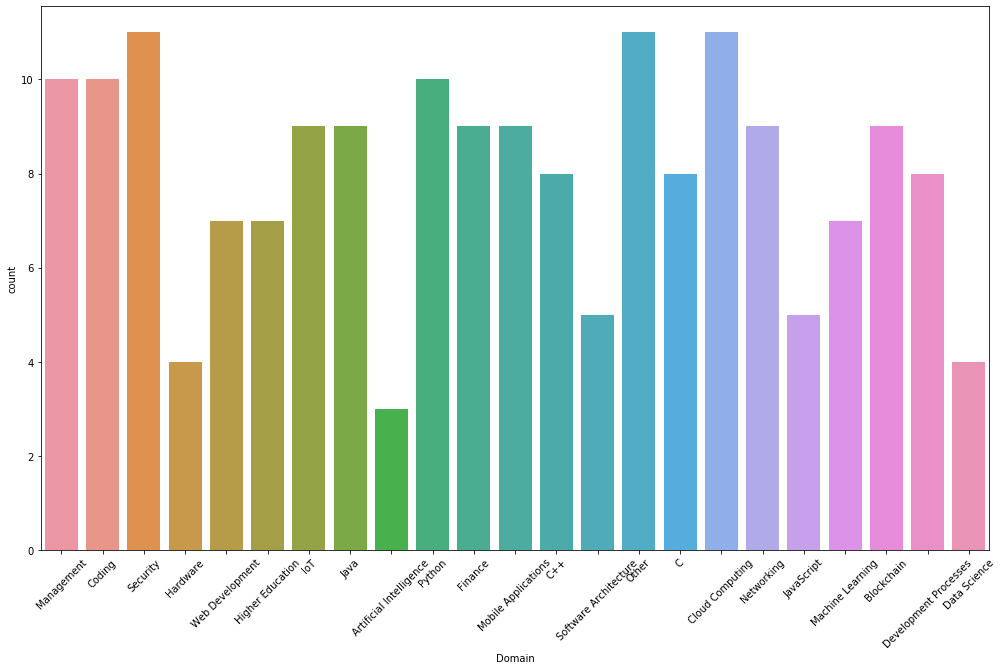

In [6]:
#plotting counts of various domains
plt.figure(figsize = (17,10))
ax = plt.gca()
sns.countplot(dataset['Domain'])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

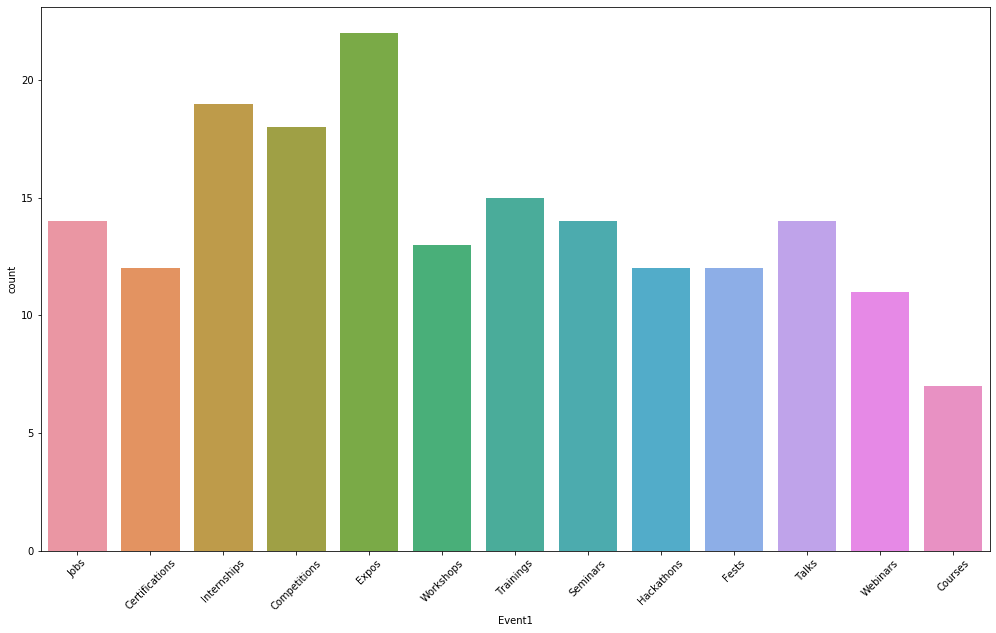

In [12]:
#plotting counts of various events
plt.figure(figsize = (17,10))
ax = plt.gca()
sns.countplot(dataset['Event1'])
plt.xticks(rotation=45)

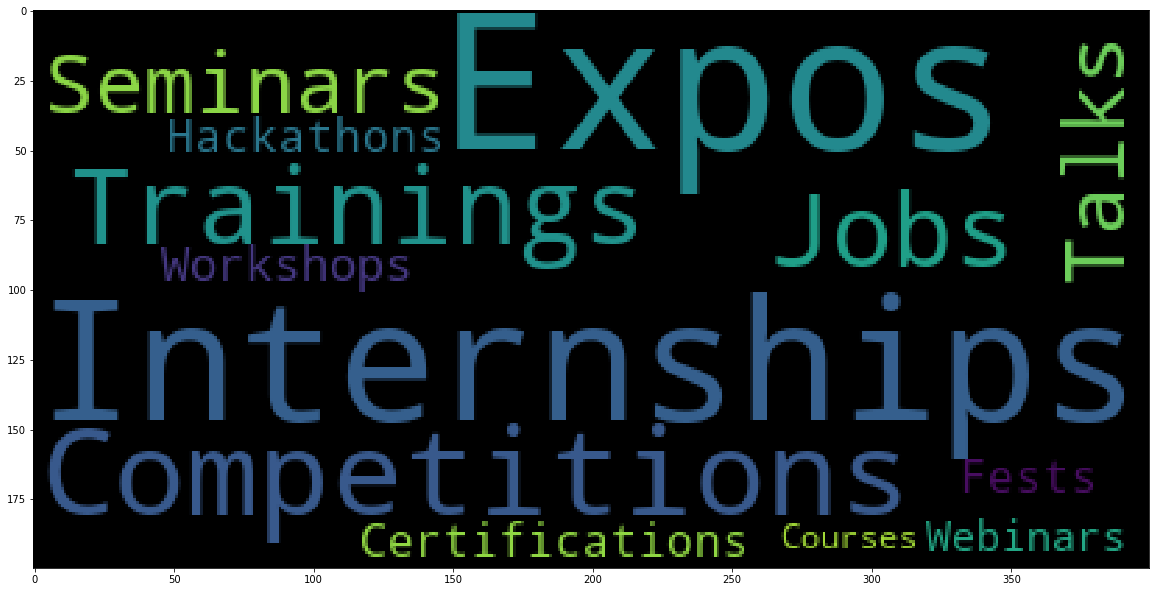

In [57]:
#visualization part
sentences = dataset['Event1'].tolist()
sentences = ' '.join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences))

In [7]:
dataset_3  = dataset.copy()
dataset_3 = dataset_3.iloc[:,1:3]
dataset_3.head()

,Domain,Event1
0,Management,Jobs
1,Coding,Certifications
2,Security,Internships
3,Hardware,Competitions
4,Web Development,Expos


In [8]:
domains__ = dataset_3['Domain']

In [9]:
dataset_3=pd.get_dummies(dataset_3['Event1'])

In [10]:
dataset_3['Domain'] = domains__

In [18]:
dataset_3.head()

,Certifications,Competitions,Courses,Expos,Fests,Hackathons,Internships,Jobs,Seminars,Talks,Trainings,Webinars,Workshops,Domain
0,0,0,0,0,0,0,0,1,0,0,0,0,0,Management
1,1,0,0,0,0,0,0,0,0,0,0,0,0,Coding
2,0,0,0,0,0,0,1,0,0,0,0,0,0,Security
3,0,1,0,0,0,0,0,0,0,0,0,0,0,Hardware
4,0,0,0,1,0,0,0,0,0,0,0,0,0,Web Development


In [11]:
domains = set(list(domains__))

In [12]:
domains = [domain.lower() for domain in domains]

In [13]:
aggregation_functions = {'Certifications': 'sum', 'Competitions': 'sum','Courses': 'sum', 'Expos':'sum', 'Fests':'sum',  'Hackathons':'sum',  'Internships':'sum',  'Jobs':'sum',  'Seminars':'sum', 'Talks':'sum','Trainings':'sum','Webinars':'sum','Workshops':'sum','Domain': 'first'}

In [14]:
new_df = dataset_3.groupby(dataset_3['Domain']).aggregate(aggregation_functions)

In [15]:
new_df.reset_index(inplace=True,drop=True)
new_df.head()

,Certifications,Competitions,Courses,Expos,Fests,Hackathons,Internships,Jobs,Seminars,Talks,Trainings,Webinars,Workshops,Domain
0,0,1,0,1,0,0,0,0,0,0,0,0,1,Artificial Intelligence
1,1,0,0,1,1,1,1,0,1,1,1,0,1,Blockchain
2,0,1,0,1,1,2,0,0,2,1,0,0,0,C
3,0,0,1,0,1,0,2,1,0,2,0,0,1,C++
4,0,0,1,2,1,1,0,0,1,1,1,0,3,Cloud Computing


In [16]:
columns = new_df.columns
columns = [col.lower() for col in columns]
new_df.columns = columns

In [17]:
new_df.columns

Index(['certifications', 'competitions', 'courses', 'expos', 'fests',
       'hackathons', 'internships', 'jobs', 'seminars', 'talks', 'trainings',
       'webinars', 'workshops', 'domain'],
      dtype='object')

In [63]:
print("Executing..")

Executing..


In [18]:
user_id_matrix = new_df.pivot_table(index = 'domain')

In [19]:
user_id_matrix.index = [index.lower() for index in user_id_matrix.index]
user_id_matrix = user_id_matrix.rename(columns = lambda x : str(x)[:-1])

In [20]:
user_id_matrix

,certification,competition,course,expo,fest,hackathon,internship,job,seminar,talk,training,webinar,workshop
artificial intelligence,0,1,0,1,0,0,0,0,0,0,0,0,1
blockchain,1,0,0,1,1,1,1,0,1,1,1,0,1
c,0,1,0,1,1,2,0,0,2,1,0,0,0
c++,0,0,1,0,1,0,2,1,0,2,0,0,1
cloud computing,0,0,1,2,1,1,0,0,1,1,1,0,3
coding,1,1,1,1,1,0,1,2,1,0,0,1,0
data science,0,0,0,1,0,1,1,0,0,1,0,0,0
development processes,1,0,0,2,1,0,0,1,1,0,1,1,0
finance,0,1,0,0,1,1,1,0,2,0,2,0,1
hardware,0,2,0,0,0,0,1,0,0,0,0,0,1


In [21]:
events = dataset['Event1']
events = set(list(events))
events = [event.lower() for event in events]
events = [event[:-1] for event in events if event.endswith('s')]

In [22]:
events

['fest',
 'certification',
 'competition',
 'training',
 'webinar',
 'seminar',
 'hackathon',
 'talk',
 'job',
 'workshop',
 'course',
 'expo',
 'internship']

In [23]:
dataset_2= dataset.copy()
dataset_2 = dataset_2.iloc[:,0:3]
dataset_2['Domain'] =dataset_2['Domain'].str.lower()
dataset_2['Event1'] =dataset_2['Event1'].str.lower()
dataset_2['Event1'] = dataset_2.apply(lambda x: x['Event1'][:-1], axis = 1)
dataset_2.head()

,Name,Domain,Event1
0,Bryan Brock,management,job
1,Joseph Sullivan,coding,certification
2,Sherri Dawson,security,internship
3,Dustin Ferguson,hardware,competition
4,Kayla Young,web development,expo


In [56]:
headers = {'Event':'Recommendations'}
def recommend(mini_challenge , i):
    aa = mini_challenge
    remove = string.punctuation
    remove = remove.replace("+", "") # don't remove + sign
    pattern = r"[{}]".format(remove) # create the pattern
    
    my_dict = {}

    mini_challenge = re.sub(pattern, "", mini_challenge) 
    mini_challenge =[char.lower() for char in mini_challenge.split() if char.lower() not in stopwords.words('english')]
    mini_challenge = [text if not text.endswith('s')else text[:-1] for text in mini_challenge]
    
    if i==0:
        with open('dict.csv','w') as csv_file:
            writer = csv.writer(csv_file)
            for key, value in headers.items():
                writer.writerow([key, value])
    
    
    #print(mini_challenge)
    
    words = [word for word in mini_challenge if  word in events] # all the events found
    #print(words)
    if len(words)>0:
        for event in words:
            recommendations = user_id_matrix[event]
            domain= recommendations.sort_values(ascending=False).head(1).index.values
            ttt = str(domain[0])
            names = dataset_2.loc[(dataset_2['Domain'] == ttt) &(dataset_2['Event1'] == event)]['Name'].values 
            #print(names)
            names = list(names)
            try:
                my_dict.append(names)
            except:
                my_dict[aa] = (names)
    
        
        with open('dict.csv', 'a') as csv_file:  
            writer = csv.writer(csv_file)
            #print(my_dict)
            for key, value in my_dict.items():
                   writer.writerow([key, value])
                
        #Converting csv -> xlsx            
        wb = Workbook()
        ws = wb.active
        with open('dict.csv', 'r') as f:
            for row in csv.reader(f):
                ws.append(row)
        wb.save('output.xlsx')           
       
        
        
    else:
        names = '---'
        try:
            my_dict.append(names)
        except:
            my_dict[aa] = (names)
    
        
        with open('dict.csv', 'a') as csv_file:  
            writer = csv.writer(csv_file)
            #print(my_dict)
            for key, value in my_dict.items():
                   writer.writerow([key, value])
                
        #Converting csv -> xlsx            
        wb = Workbook()
        ws = wb.active
        with open('dict.csv', 'r') as f:
            for row in csv.reader(f):
                ws.append(row)
        wb.save('output.xlsx')   
        

In [49]:
inputs = pd.read_csv('input.csv')


,Name
0,Machine Learning workshop and internship
1,Digital Marketing Webinar
2,System Administration certification from Purpl...
3,Arrange a machine Learning hackathon
4,Job fair for undergraduate students
5,Grab a internship oppourtunity in the amazing ...
6,Seminar for finance students
7,2 Months Training Program on app-development a...
8,Excel your skill with these free courses on c...


In [62]:
try:
    for i in range (len(inputs)):
        text = inputs.iloc[i,:][0]
        #print(text[:4])
        recommend(text , i)
    print('Success!!')
except:
    print('There may be permission error so ,run One more time')

Success!!
